![8th International Summer School on Computational Interaction](imgs/header.png)


# 1: Introduction to Forward and Inverse Modelling
**John H. Williamson**

## Who am I?

I'm **John H. Williamson**, from the University of Glasgow. 

* JohnH.Williamson@glasgow.ac.uk   @jhnhw  | [github.com/johnhw](https://github.com/johnhw)

<img src="imgs/uofg.jpg">

### Why am I here?
* I'm interested in computational approaches to HCI, particularly probabilistic and Bayesian methods and active inference, as well as control theoretic and unsupervised learning approaches.
* I've been doing this for a long time (>20 years!)
* (I founded the Summer School on Computational Interaction back in 2015, so it's nice to be back!).


## Advert
**If you know a (Masters/Bachelors) student graduating soon who might be interested in a PhD in computational HCI, I have a position open in building *Optimal Mechanisms* for HCI as part of an ERC project.**

> The PhD will involve exploring the use of dynamical systems, unsupervised learning/low-dimensional embeddings and probabilistic inference to build robust controls for modern user interfaces; foundation models for low-level interaction components. This, for example, might involve mapping of optical hand tracking, pressure sensing or EMG input to machine learning-based recommendation systems – but the PhD would focus on general interaction principles rather than a specific use case. This project is part of a wider ERC project, DIFAI, looking at Active Inference as a principle for human-computer interaction. This project will involve:

>(a)	Developing theoretical models of closed-loop interaction from an active inference perspective;

>(b)	Designing and implementing mediating mechanisms to link humans to machine learned systems;

>(c)	Evaluating the performance and efficacy of the mechanisms through empirical trials.

> The PhD will thus involve a mix of experimental work with human subjects, mathematical modelling and implementation of new user interface components.

> The successful candidate will have a strong interest/background in human-computer interaction and user modelling as well as a strong background probabilistic modelling, dynamical systems/control theory or active inference and the free energy principle. Strong modelling and software development skills are essential for this studentship. 

> This PhD project will be part of the ERC Advanced Grant “Designing Freedom through Active Inference (DIFAI)”


### Interactive elements

https://www.menti.com/al3qn88pvwk4

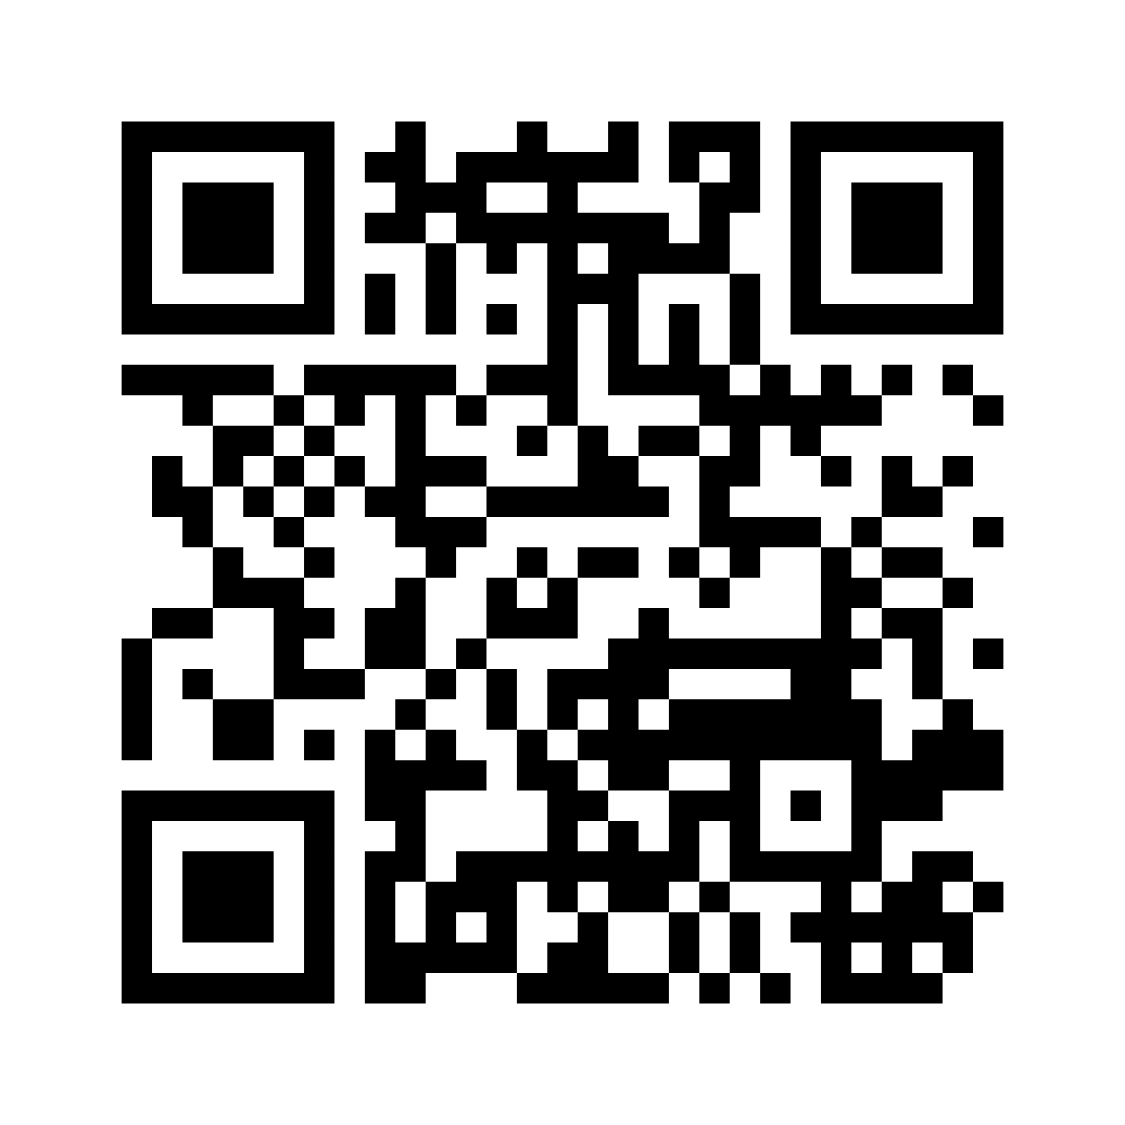

## Notebooks

All of the notes for this course are executable Jupyter notebooks, using Python. See [readme.md](readme.md) for installation and setup instructions.

## Timeline for the morning

* 0900-1100: [Introduction to Forward and Inverse Modelling](01_Introduction.ipynb)
    * Direct inversion via machine learning
    * Bayesian inversion via probabilistic filtering
* 1100-1200: [Hands-on practical session](02_Exercise.ipynb)
* 1200-1300: [A review](03_Review.ipynb)




# An example: rich touch sensing

![A finger being sensed by a capacitive board](imgs/finger_track.png)

*A finger being sensed by a capacitive sensor. From the vector of values we get back, how can we recover the finger pose? Or, more generally, what the user was trying to do? The grid is real, but what finger "contours" generated them?*

What is going on here?

* We get a fixed-sized array of values $\bf{x_t} = [x_0, x_1, \dots]$ at each time step $t$ -- a **frame**. 
* This somehow captures the configuration of conductive bodies, like fingers, above the sensor.
* We want to turn this into something that a user can use to *convey intention* -- get the system to do what they want.

Usually we divide this into two steps:

* **Cursor** Recover some intermediate state from $\bf{x_t}$, like a ``cursor'' to indicate something related to the *physical configuration* of the world (but not usually an *actual* position!), outputing a simpler $\bf{y_t}$
* **State** UI components respond to ${\bf y_t}$ representing cursor locations and state changes (e.g. touch up/down, swipes, etc.)

In some cases these are conflated into a single step, such as a gesture system that takes a sequence of frames and directly actuates commands.

---

> **IMPORTANT**
> I'm using this as a concrete example of a general problem throughout this morning, because details matter. But the ideas we'll talk about generalise widely.This might be another input device (like a mobile radar, depth camera or pressure sensor) or it might be more high-level, like a recommendation system or a dialogue system. The basic ideas remain the same

---



## Questions

* How do we do this transformation from $\bf x_t$ to $\bf y_t$?
* What makes this hard? 
* **How can we use computational methods to address this?**
    * In particular, how does (or how can) *simulation-based inference* help us?
* What do we do if the input device changes? For example, if the density of the sensor array changes, or we add a mm-wave radar tracker? Or if the user changes? Now they're older or tired or have a different hand shape?

I'll use the ``finger tracking'' problem as an example of an input problem we can understand easily, but the ideas generalise to many input problems.




# What is the input problem?

![The input problem](imgs/brain_inference.png)

We are going consider the problem of **input**. We'll assume the "classical dyad", where a single human user interacts with a single system, such as someone browsing on their phone. The user has an intention, which they wish to communicate to the system. The user and system are connected via an interface. The user and system are both embedded in the physical world, and this environment influences the way in which information propagates between the user and the system.

**Input** is the process by which intention -- what a user wishes to do -- is transduced into a change of state in the system. It is a fundamental problem in  human-computer interaction. This is typically a closed-loop process, where the user observes the system's response and adjusts their input accordingly. Intention is rarely expressed ballistically, where an intention is packaged up as a single command and sent to the system. Instead, it is a continuous process, where the user's intention is continually updated based on feedback.

## Sensing
The system observes its environment via sensors. Some part of the signal those sensors transduce is related to the user's intended input and thus indirectly to their intention. 

Common, traditional sensors like mice are very *selective*. Their physical form and sensing properties means that they are effective at rejecting environment states that are unrelated to intention. 

But many sensors we'd like to be able to use for input are not so selective. Cameras, for example, pick up a lot of information that is not related to intention. They might capture millions of pixels in a frame and dozens of frames in a second. A user, however, is likely to be generating slow changes in a subspace of very low-dimension -- manipulating a slider, for example. All of the other information is irrelevant; the lighting conditions, the background environment, the clothing of the user, tiny physiological movements like breathing or tremor. 

## Tangling with the environment

![Tangling with the environment](imgs/brainspace.png)

What a sensor vector captures is typically a convoluted mixture of the user's intention and the environment. The environment is a source of noise, but it is also a source of contextual information. Intentions originate in a user's mind, and then propagate forth via their motor system, which influences the physical state of the environment. Those changes are detected by sensors, which then feedback updated internal states into the user's mind via display channel and thence into the user's mind via the user's perceptual system. 






## The computational interaction approach

We want to approach this *computationally*. That is, we want algorithmic, principled approaches that can use computational power to scale their capabilities.

> Computational interaction: if adding another GPU would improve user experience, then it's a computational interaction problem.

What tools do we have available to tackle this problem? There are two distinct approaches to this problem:

---

* **Direct inverse models** are models that take sensor data and directly infer the user's intention. 
    * These are typically machine learning models, such as deep networks, that are trained on large datasets of sensor data and corresponding intentions. 
    * They are typically trained in a supervised manner, where the intention is provided as a label for the sensor data. 
    * They are usually very computationally efficient.
    * They can adapt to very complex mappings from input to state.
    * These models are typically *black boxes* -- they are not interpretable, and they do not provide any insight into the underlying interaction phenomena. 
    * They are also typically *deterministic* -- they provide a single answer for a given input. 
    * They are commonly *static* -- they do not update their beliefs about the user's intention as new data arrives. Instead, they map a sensor vector to an intention. 
    * Such ML based models are **data-driven** and usually derive their power from the volume of training data used to train them.

---

* **Bayesian inversion** where we use *forward* models to invert the process of intention generation. We build a model of how a user's intention *would* be expressed in terms of sensing, and then use the sensor vectors to infer the parameters of that model. 
    * This is a *generative* approach -- we build a model that can simulate sensor data given an intention. 
    * This model is typically *interpretable* -- we can understand the parameters of the model in terms of the underlying interaction phenomena. 
    * It is also *probabilistic* -- it provides a distribution over possible intentions, given the sensor data. 
    * It is also *dynamic* -- it updates its beliefs about the user's intention as new data arrives. But it is both computationally expensive and requires expert knowledge. 
    * These models are **model-driven** and derive their power from the representation of uncertainty and the ability to update beliefs sequentially and to fuse information from multiple sources.

---

As we'll later see, this is not completely an either/or choice. We can use both approaches in concert, with the Bayesian inversion model providing a prior over the space of possible intentions, and the direct inverse model providing a fast, approximate estimate of the user's intention. We can also ML approaches to build fast *forward* models that can be used in the Bayesian inversion process (*emulation approaches*).


## In pictures
![Forward and inverse models](imgs/fwd_inv_finger.png)

* **Epistemic uncertainty** uncertainty due to lack of knowledge about the world. This is the uncertainty that can be reduced by gathering more data.
* **Aleatoric uncertainty** uncertainty due to the inherent stochasticity of the world. This is irreducible ("random") uncertainty that cannot be reduced by gathering more data.



# Demo example

We're going to work with a "fake" touch sensor in the practical example, as I can't provide hardware fo everyone to test.

Instead, we're going to get a raw capture of keyboard scan-codes, and use that as our "sensor data". There's a little bit of code that translates the codes into arrays of "touches" on a 2D grid, applying a little bit of lag, blur and noise to simulate a real sensor.

This is (for most keyboards) a multi-touch sensor, though it has some characteristically weird behaviour due to the way the keyboard is scanned. 

## Fist pointer
We're going to model the "fist-pointer" -- mashing your fist across the keyboard like a massive thumb. This has a few interesting properties:

* The contact point spans multiple receptive fields (i.e. keys!);
* Edge effects are relevant, as your fist covers a substantial proportion of the keyboard;
* The fist can be manipulated in 3D, by rolling or twisting the wrist;
* The fist has naturally constrained dynamics, especially when it contact with your keyboard.
* Contact point size can be modulated by moving from one finger to two to a full fist or palm.

**If you're running this yourself, please be gentle with your keyboard!**


Let's try the fake touch sensor. **Press Ctrl-ESC Ctrl-ESC to end the demo -- all other keyboard input is trapped!**


In [2]:
# Note: we launch this in a separate process to solve multiprocessing issues 
# with the keyboard library. Auto kill after 60 seconds to prevent hanging.
from zmqutils import safe_launch
#safe_launch("src/key_demo.py", timeout=30)

# Direct inverse models
We'll first build a **direct inverse model** -- that is, we'll choose some attributes that we believe are *generating* the signals that we see, and learn an association between observed signals and known exemplars of the generating attributes, generally by labelling certain elements of the signals manually.  

## Formulation of the problem
In less abstract terms, we'll take "touch sensor images" as **features** along with *known* coordinate pairs as **targets**,  representing the center point of the "fistpointer" and use supervised learning to learn a function $$y = f(x;\theta),$$ where $\theta$ are some parameters we can learn through optimisation. This is a regression problem, prediciting continuous coordinates from input vectors. We'll use a simple neural network to do this prediction and optimise the parameters with gradient descent. The details of this aren't especially important, but we'll explore ways in which we can improve the *generalisation* performance once we have a basic predictor running. 


## Data collection
To do this, we need some training data. You can capture your own training data with the cell below, or you can use the data I pre-recorded. The data that comes from our sensor is formatted as follows: 
* **Features** a (9,30) array of touch sensor activations (in range 0-1), flattened to a 270 element array 
* **Targets** a (2,) array of 2D touch positions annotated by an "expert user".

These are stored in a CSV as 272 element rows.



In [2]:
import jax.numpy as jnp # we'll use JAX in this exercise
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import sys 
sys.path = ['src'] + sys.path


In [3]:

data = np.loadtxt("data/clean.csv", delimiter=",").astype(np.float32)

In [4]:
# split the features from the targets
data_features, data_targets = data[:, :-2], data[:, -2:]
# split into test and train
X_train, X_test, y_train, y_test = train_test_split(data_features, data_targets, test_size=0.2, random_state=42)


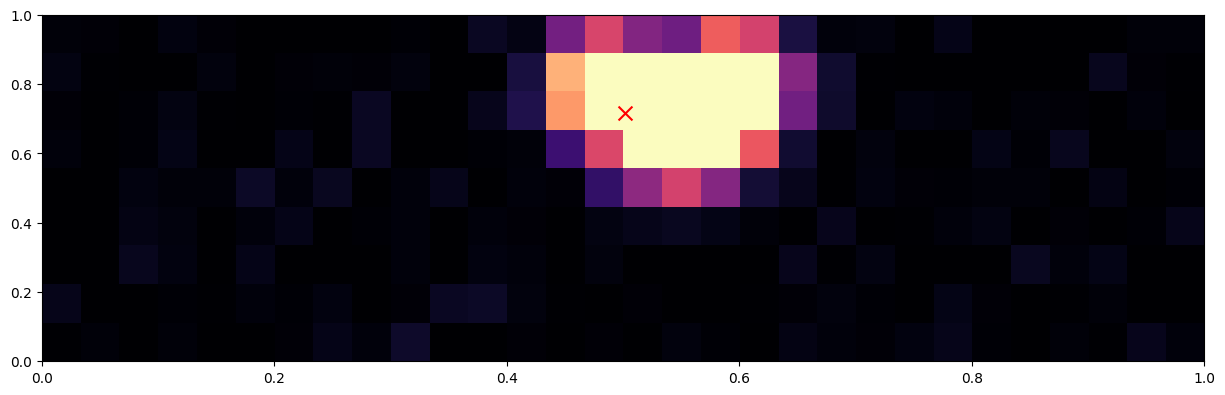

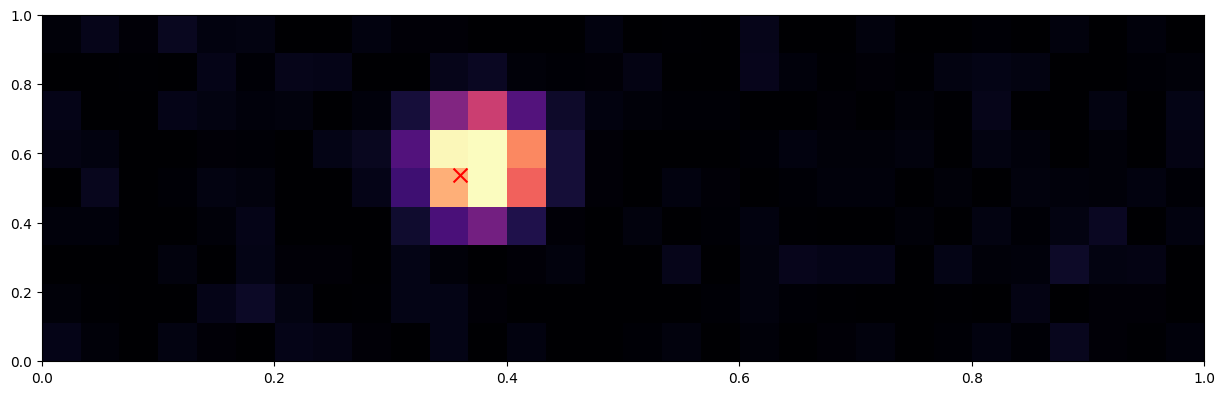

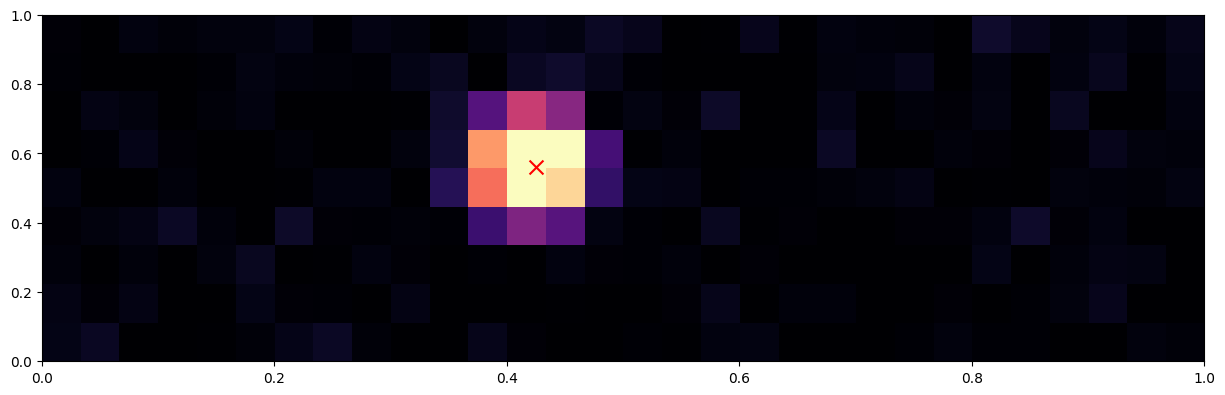

In [5]:
# validate that the data looks sensible!
for i in range(3):
    fig, ax = plt.subplots(figsize=(15, 4.5))
    row_ix = np.random.randint(0, data_features.shape[0])
    # fit image to 0,1 coordinate space
    ax.imshow(data_features[row_ix].reshape(9, 30), cmap='magma', aspect='auto', extent=[0, 1, 0, 1], vmin=0, vmax=1, origin='lower')
    ax.scatter(data_targets[row_ix,0], data_targets[row_ix,1], color='red', marker='x', s=100)


## Training a model
We'll now fit a model to this data and check the performance. We'll use a simple multi-layer perceptron architecture with a single hidden layer. We'll use JAX and Flax to do this; the details of the library don't matter if you're not familiar with JAX.

All we're doing is passing the input (270D) vector through a sequence of transforms, and gradually reducing the dimension to the 2D output prediction we want.


In [6]:
from flax import linen as nn
from flax.training import train_state
import optax
import jax 

# Define the MLP model
class MLP(nn.Module):
    # 270 -> 128 -> 32 -> 2 dimensions
    # this is pretty arbitrary but works
    @nn.compact
    def __call__(self, x):
        x = nn.Dense(features=128)(x)
        x = nn.relu(x)
        x = nn.Dense(features=32)(x)
        x = nn.relu(x)
        x = nn.Dense(features=2)(x)  # Output layer with 2 dimensions
        return x

# Define a function to create the train state
def create_MLP(rng, learning_rate):
    model = MLP()
    params = model.init(rng, jnp.ones((1, 270)))  # Initialize parameters with an example input
    tx = optax.adam(learning_rate)
    return train_state.TrainState.create(apply_fn=model.apply, params=params, tx=tx)


In [7]:

# Define the loss function (MSE)
def mse_loss(predictions, targets):
    return jnp.mean((predictions - targets) ** 2)

# Define the evaluation function (for testing)
def evaluate(state, batch):
    predictions = state.apply_fn(state.params, batch['inputs'])
    loss = mse_loss(predictions, batch['targets'])
    return loss

# predict an output from a single
def predict(state, single_input):
    single_input = single_input.reshape(1, -1)  # Ensure the input has the shape (1, 270)
    prediction = state.apply_fn(state.params, single_input)
    return prediction



# One training step
@jax.jit
def train_step(state, batch):
    def loss_fn(params):
        predictions = state.apply_fn(params, batch['inputs'])
        loss = mse_loss(predictions, batch['targets'])
        return loss    
    loss, grads = jax.value_and_grad(loss_fn)(state.params)
    state = state.apply_gradients(grads=grads)
    return state, loss



In [8]:
# Train the model
rng = jax.random.PRNGKey(42)
learning_rate = 0.001
mlp_state = create_MLP(rng, learning_rate)

batch = {'inputs': X_train, 'targets': y_train}

# train loop
for i in range(1_000):
    mlp_state, loss = train_step(mlp_state, batch)
    if i % 100 == 0:
        print(f'Step {i}, Loss {loss}')
    


Step 0, Loss 0.35992541909217834
Step 100, Loss 0.0004247364995535463
Step 200, Loss 1.1771160643547773e-05
Step 300, Loss 3.1898684937914368e-06
Step 400, Loss 8.681151939526899e-07
Step 500, Loss 1.897880537171659e-07
Step 600, Loss 3.2452089016032915e-08
Step 700, Loss 4.34820623951282e-09
Step 800, Loss 4.563921740530219e-10
Step 900, Loss 3.7457117268990814e-11


In [9]:
# Evaluate the model, and plot some examples
test_batch = {'inputs': X_test, 'targets': y_test}
test_loss = evaluate(mlp_state, test_batch)
print(f'Test loss: {test_loss:.4f}')

Test loss: 0.0453


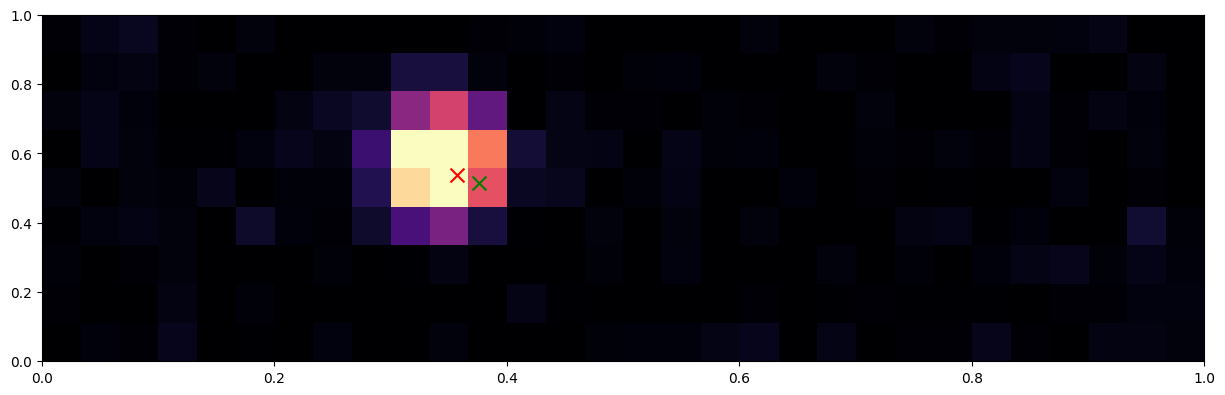

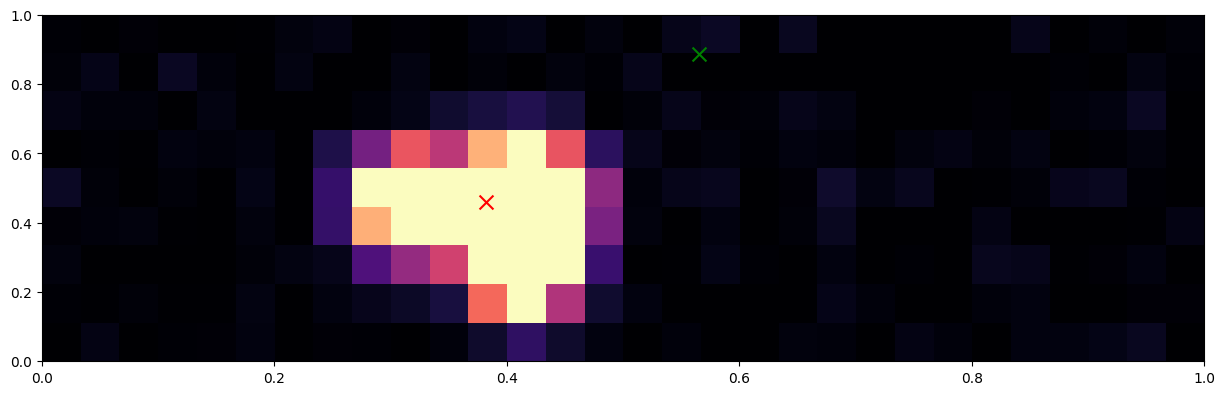

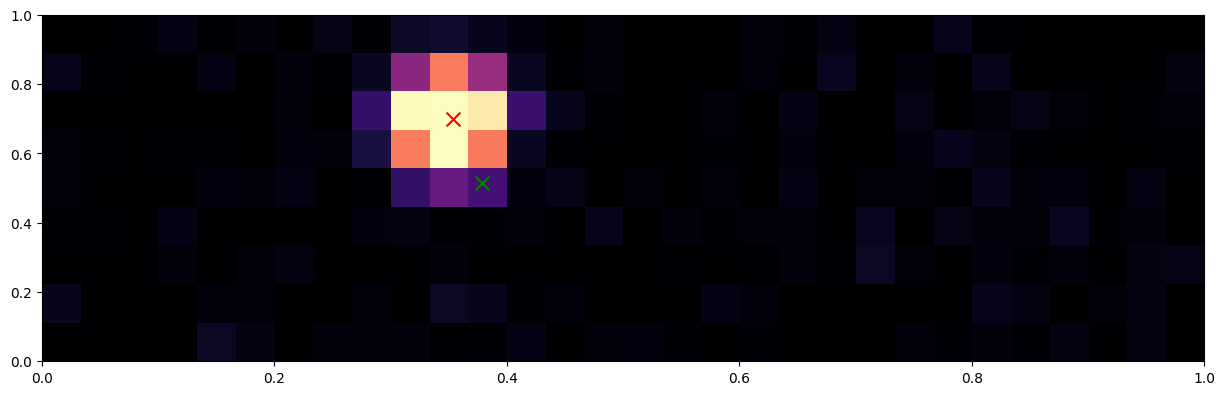

In [10]:
# validate that the predictions looks sensible from the test set!
def show_test_images(x, y, predict=None, n=3):
    for i in range(n):
        fig, ax = plt.subplots(figsize=(15, 4.5))
        row_ix = np.random.randint(0, x.shape[0])
        # fit image to 0,1 coordinate space
        ax.imshow(x[row_ix].reshape(9, 30), cmap='magma', aspect='auto', extent=[0, 1, 0, 1], vmin=0, vmax=1, origin='lower')
        ax.scatter(y[row_ix,0], y[row_ix,1], color='red', marker='x', s=100)
        # show the predictions
        if predict is not None:
            prediction = predict(x[row_ix])
            ax.scatter(prediction[0,0], prediction[0,1], color='green', marker='x', s=100)

show_test_images(X_test, y_test, lambda x:predict(mlp_state, x), n=3)        

## Live model
We can now link the prediction model into the live data stream. We'll use a simple ZMQ setup to send the touch data from the key_demo.py script to this script. We'll then use the model to predict the output and send it back to `key_demo.py`. This is slightly awkward because of the need to separate the Jupyter and GUI processes, but ZMQ deals with most of the complexity:

In [11]:
from zmqutils import rep_loop

def prediction_loop(predict_fn, port=5556):
    # synchronous reply loop -- receive touch events and reply with predictions
    def loop_fn(touch_input):
        # respond to touch events
        if "touch" in touch_input:            
                # decode it, predict and send a response
                x = np.array(touch_input["touch"]).astype(np.float32).reshape(1, 270)
                seq = touch_input["seq"]
                y = predict_fn(x)
                msg = {"target": {"x": float(y[0,0]), "y": float(y[0,1]), "radius":0.05}, "seq":seq}
                print(f"{seq}                     \r", end="")
                return msg
        # queue shutdown
        if "quit" in touch_input:
                raise StopIteration
    rep_loop(port, loop_fn)

In [15]:

# run the prediction loop
#safe_launch("src/key_demo.py", args=["--zmq_port", "5556"], timeout=0)
prediction_loop(lambda x:predict(mlp_state, x))


{'touch': [[0.029733164053380508, 0.0, 0.005769400591023155, 0.0, 0.018157716453568454, 0.009847240961658473, 0.026036161132717246, 0.0, 0.0028268356910326068, 0.05980182276443284, 0.006906872594756647, 0.03799195489062916, 0.0, 0.023498822849783926, 0.0, 0.0, 0.0, 0.01482179432396558, 0.019569918663113146, 0.0, 0.04511201206441676, 0.0, 0.005779641201242791, 0.0347511011484755, 0.0, 0.0, 0.0, 0.0033595110308208675, 0.02989441037453506, 0.007283750982294123], [0.006917601444938431, 0.0260250056767852, 0.006496140643805945, 0.0, 0.012300310060616729, 0.03447171339555162, 0.01260419354461835, 0.014783224441523803, 0.040149847310622454, 0.0, 0.0, 0.07014530155129776, 0.0331142832560148, 0.0, 0.0, 0.0, 0.0017697553885041748, 0.03339309230756412, 0.04036814848956567, 0.01848657711217882, 0.005121302954940418, 0.0, 0.021616501524893958, 0.0, 0.0033749189852818086, 0.012137036337803742, 0.030496861654288394, 0.0, 0.0, 0.009661948399334267], [0.01869795668391185, 0.01768241962091719, 0.0383257

NameError: name 'e' is not defined

## A better model; equivariance via convolution
This doesn't work that well. Why not?

* The model lacks **inductive bias** -- it doesn't know anything about the structure of the input data. It has a very weak model of the world.
* One form of model that we could assume is that the touch sensor is relatively spatially equivariant -- that is, the same pattern of fist activity should produce the same sensor output, regardless of where it is on the sensor.
* That is, we can freely translate around the sensor without changing the output. This is a property of the physical world -- the sensor is a 2D grid, and the physical world is (fairly!) translationally invariant.

We can encode this by implementing a *convolutional* neural network. This is a neural network that has a "convolutional" layer, which applies a set of filters to the input data. These filters are *shared* across the input space, so that the same filter is applied to every part of the input. This is a form of *equivariance* -- the network is forced to learn a representation that is invariant to translation.

This is a simple change to our model:



In [ ]:
# Define the CNN model
class CNN(nn.Module):
    @nn.compact
    def __call__(self, x):
        # 3,3 conv -> relu -> 3,3 conv -> relu -> flatten -> dense -> relu -> dense
        # reshape to a 9x30 1 channel image
        x = x.reshape((x.shape[0], 9, 30, 1))
        # 3x3 convolution with 32 filters, followed by ReLU activation
        x = nn.Conv(features=8, kernel_size=(3, 3))(x)        
        x = nn.relu(x)
        # 3x3 convolution with 32 filters, followed by ReLU activation
        x = nn.Conv(features=8, kernel_size=(3, 3))(x)
        x = nn.relu(x)
        # flatten 
        x = x.reshape((x.shape[0], -1))
        # dense layer with 128 units, followed by ReLU activation
        x = nn.Dense(features=32)(x)
        x = nn.tanh(x)
        # and a 2 layer output
        x = nn.Dense(features=2)(x)
        return x
    
# Define a function to create the train state
def create_CNN(rng, learning_rate):
    model = CNN()
    params = model.init(rng, jnp.ones((1, 270)))  # Initialize parameters with an example input
    tx = optax.adam(learning_rate)
    return train_state.TrainState.create(apply_fn=model.apply, params=params, tx=tx)

In [ ]:
# Train the model
rng = jax.random.PRNGKey(42)
learning_rate = 0.001
cnn_state = create_CNN(rng, learning_rate)

batch = {'inputs': X_train, 'targets': y_train}

# train loop
for i in range(5_00):
    cnn_state, loss = train_step(cnn_state, batch)
    if i % 100 == 0:
        print(f'Step {i}, Loss {loss}')

Step 0, Loss 0.3981623947620392
Step 100, Loss 4.100449223187752e-05
Step 200, Loss 3.581113787731738e-07
Step 300, Loss 1.6799516222576472e-09
Step 400, Loss 1.2705759838346764e-12


Test loss: 0.0375


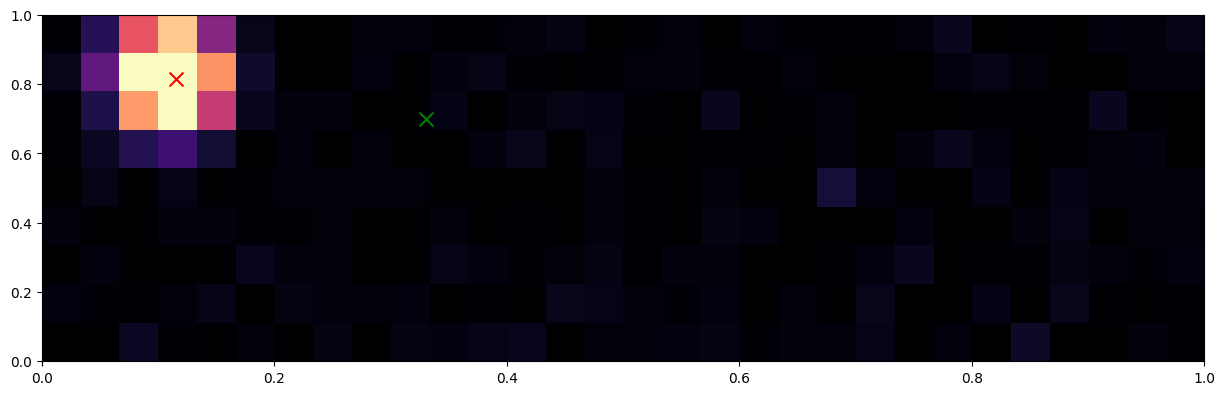

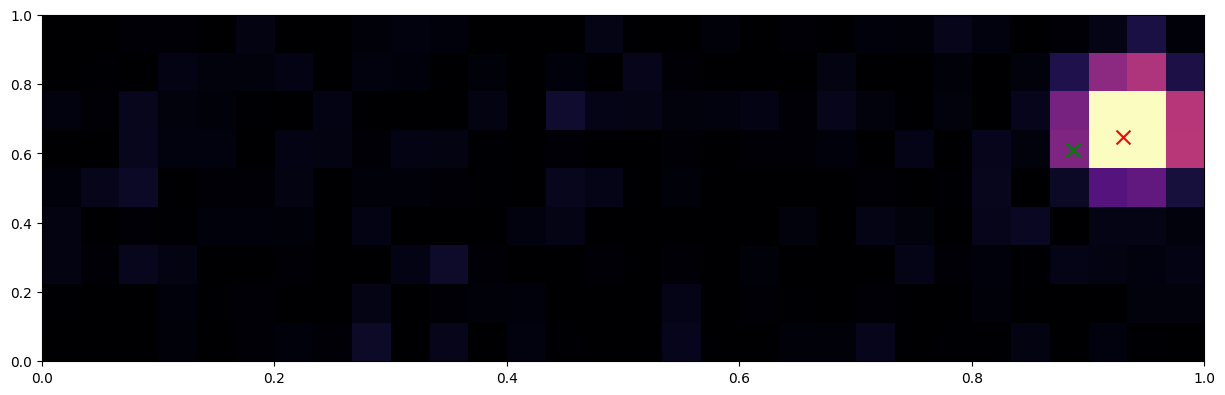

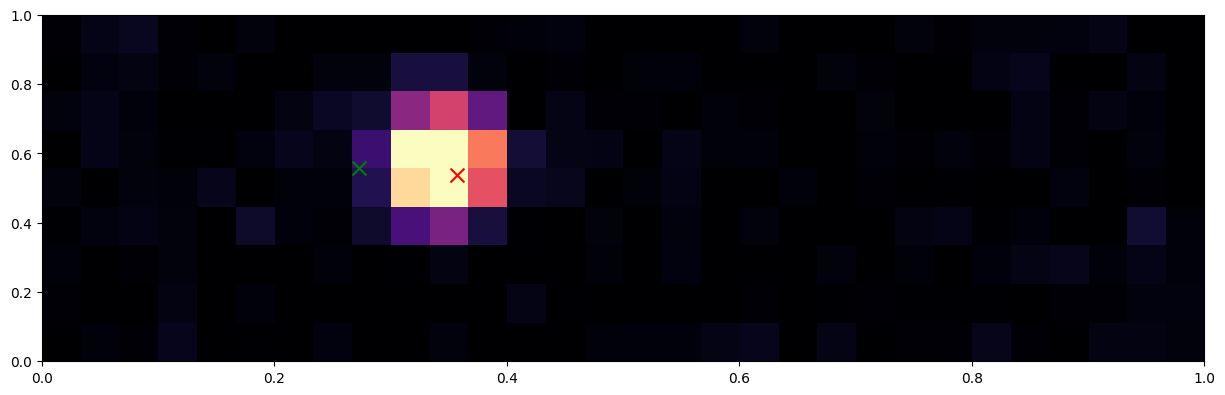

In [ ]:
# Evaluate the model, and plot some examples
test_batch = {'inputs': X_test, 'targets': y_test}
test_loss = evaluate(cnn_state, test_batch)
print(f'Test loss: {test_loss:.4f}')

show_test_images(X_test, y_test, predict=lambda x:predict(cnn_state, x), n=3)

## A better model again; augmentation

We still have relatively weak performance in some cases. To address this, we can introduce more of our knowledge about how the world works into our model. One approach to doing that is to **simulate** data that we believe is plausible, but that we haven't seen in our training data. 

We can do this by **augmenting** our training data. This is a common technique in machine learning, where we take our training data and apply a series of transformations to it that we believe are plausible. For example, we might rotate an image, or add noise, or blur it. This is a form of **regularisation** -- it makes the model more robust to variations in the input data. We're essentially expanding out the dataset to "cover" more of the possible inputs that could map to an output. 

In this way, we can make our model more robust to the variations in the input data that we might see in the real world.



### What is augmentation?
Augmentation is often blindly applied as a way of improving generalisation performance. But it is more than that -- we are making steps towards *simulation*. We are building a model of the world that can generate plausible data. This is a form of **forward modelling** -- we are building a model that can generate sensor data given an intention. We're still heavily reliant on observed data to build our inverse model, but we are starting to improve the inversion by scaffolding a simple forward model that can simulate plausible variations of real observations. These steps toward a principled, simulation based outlook are the on the path we will explore in the next section.

Note that we've now seen *two* distinct ways to model the world:

* **constrain the inversion model**, such that our inductive biases are more aligned with the structure of the world;
* **augment the data** to cover more of the possible input space, by simulating possible variations.

The constraints can be seen as a form of simulation -- we're essentially saying that we can simulate the appearance of a touch blob at one location with an equivalent one at another location, although it's not encoded as a literal forward model.

### What augmentation?
In this case, we'll apply some very simple augmentation: we can:
* **add noise** to simulate sensor noise, drawing samples from possible noise vectors we *didn't* observe;
* **add blur** to simulate varying fist sizes;
* **add value scaling** to simulate different activation strengths/pressures;
* **add flip** to simulate left-handed users (and cover more keyboard space);



In [ ]:
import scipy.ndimage 

def augment(rng, x, y, noise_level=0.03, blur_min=0.01, blur_max=1.0, scale_std=0.2):
    # augment a (batch, height, width, 1) image, returning the same shape
    # we need the targets, as they need to be flipped if we randomly flip the image
    augmented_x = []
    augmented_y = []

    
    for x_b, y_b in zip(x,y):
        x_b = x_b.reshape((9, 30, 1)) # shape back to an image for augmentation

        # randomly blur each element of the batch
        blur_sigma = jax.random.uniform(rng, minval=blur_min, maxval=blur_max)
        x_b = scipy.ndimage.gaussian_filter(x_b, sigma=(blur_sigma, blur_sigma,0), truncate=3)

        # add noise         
        x_b = x_b + jax.random.normal(rng, x_b.shape) * noise_level

        # flip, randomly (both inputs and targets!)
        flip_h = jax.random.bernoulli(rng, 0.5)
        flip_v = jax.random.bernoulli(rng, 0.5)
        if flip_h:
            x_b = x_b[:, ::-1]
            y_b = y_b * jnp.array([1, -1]) + jnp.array([0, 1])
        if flip_v:
            x_b = x_b[::-1]
            y_b = y_b * jnp.array([-1, 1]) + jnp.array([1, 0])

        # add some scaling, and clamp it to 0,1
        x_b = x_b * (1.0 + scale_std*jax.random.normal(rng))
        x_b = jnp.clip(x_b, 0, 1)

            
        augmented_x.append(x_b.flatten())
        augmented_y.append(y_b)
    return jnp.stack(augmented_x), jnp.stack(augmented_y)

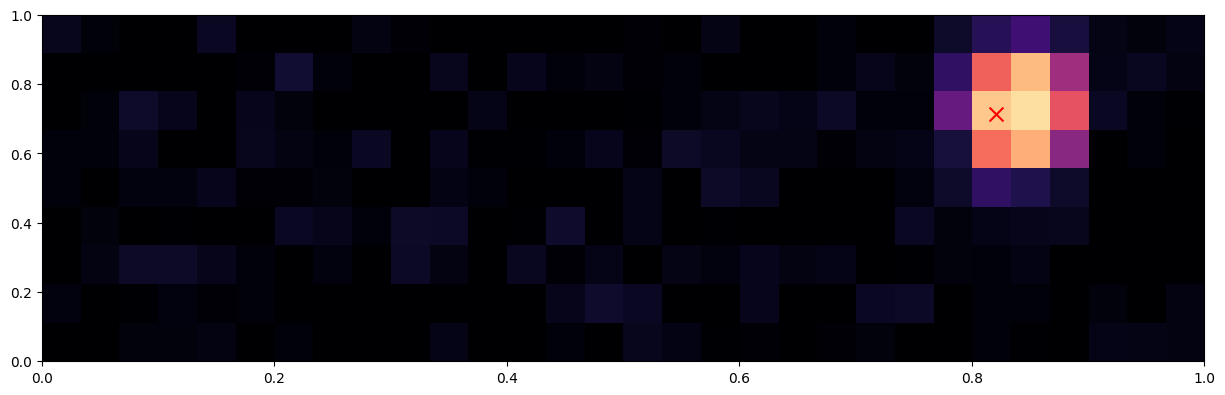

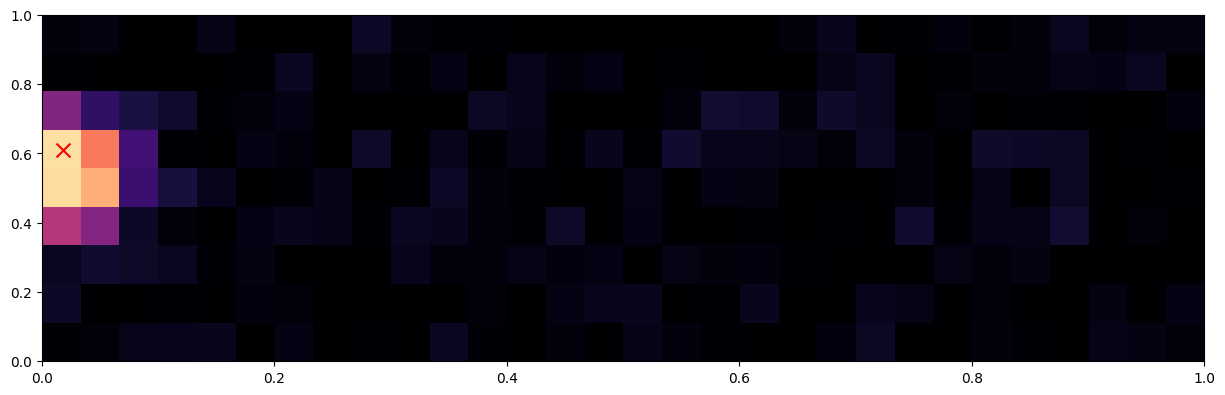

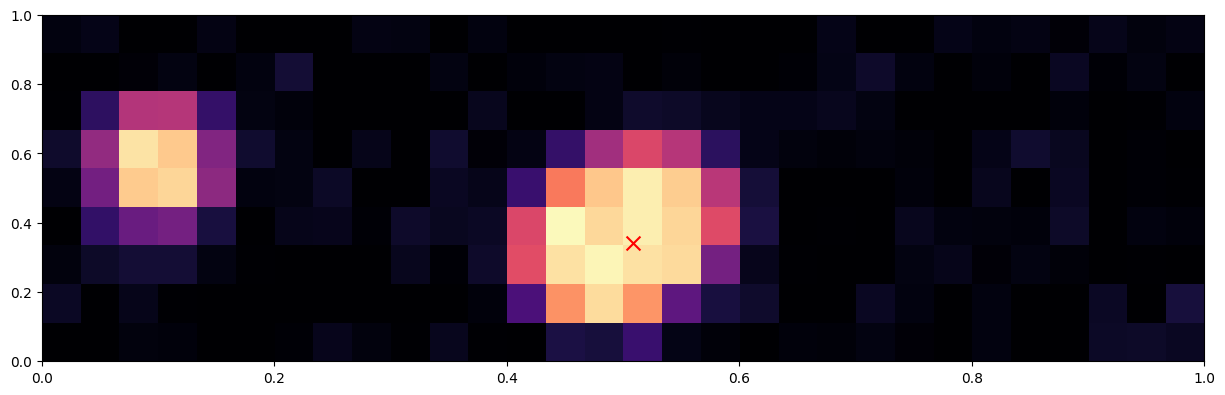

In [ ]:
rng = jax.random.PRNGKey(42)
x_augmented, y_augmented = augment(rng, X_train, y_train)

show_test_images(x_augmented, y_augmented, n=3)        


In [ ]:
# Train the model
rng = jax.random.PRNGKey(42)
learning_rate = 0.001
cnn_state = create_CNN(rng, learning_rate)

# train loop
t = 0
for i in range(30):
    # augment
    x_augmented, y_augmented = augment(rng, X_train, y_train)
    for j in range(5):    
        cnn_state, loss = train_step(cnn_state, {'inputs': x_augmented, 'targets': y_augmented})
        if t % 100 == 0:
            print(f'Step {t}, Loss {loss}')
        t = t + 1 

Step 0, Loss 0.24180135130882263
Step 100, Loss 1.2185873856651597e-05


Test loss: 0.0329


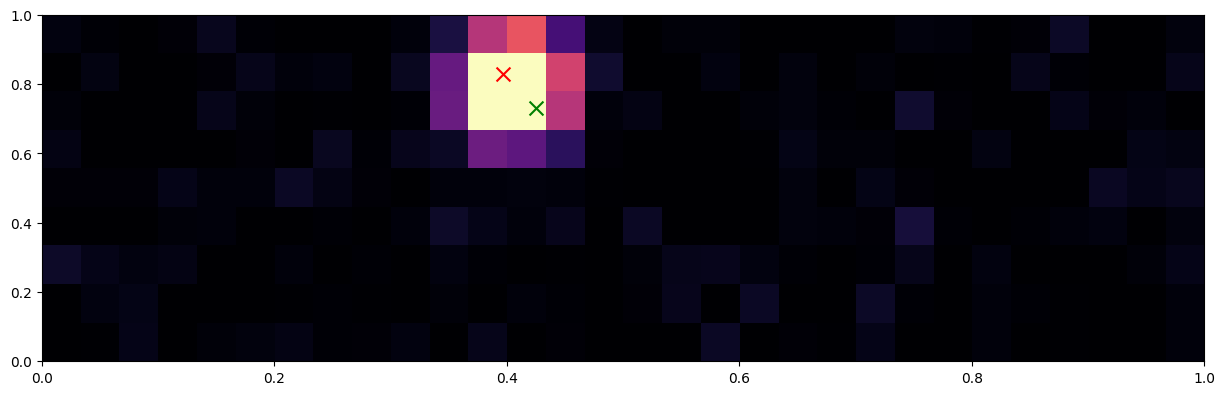

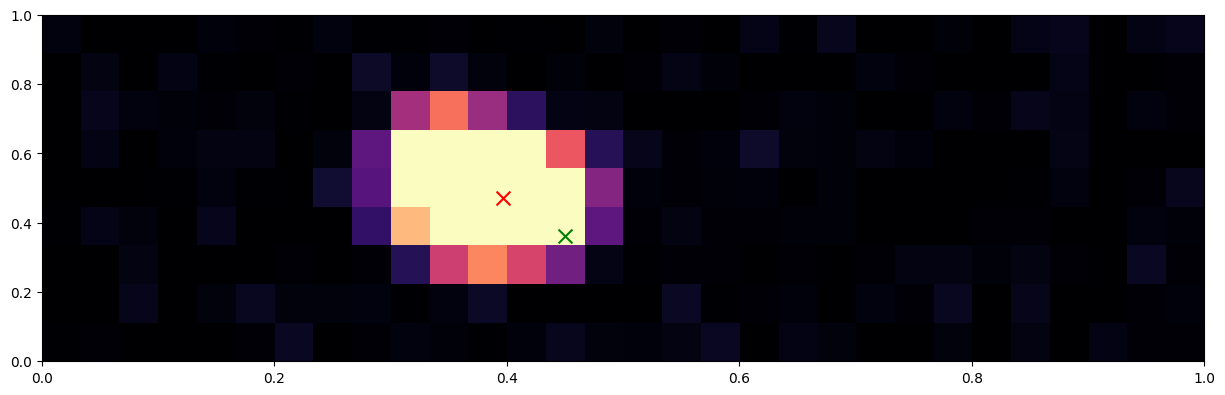

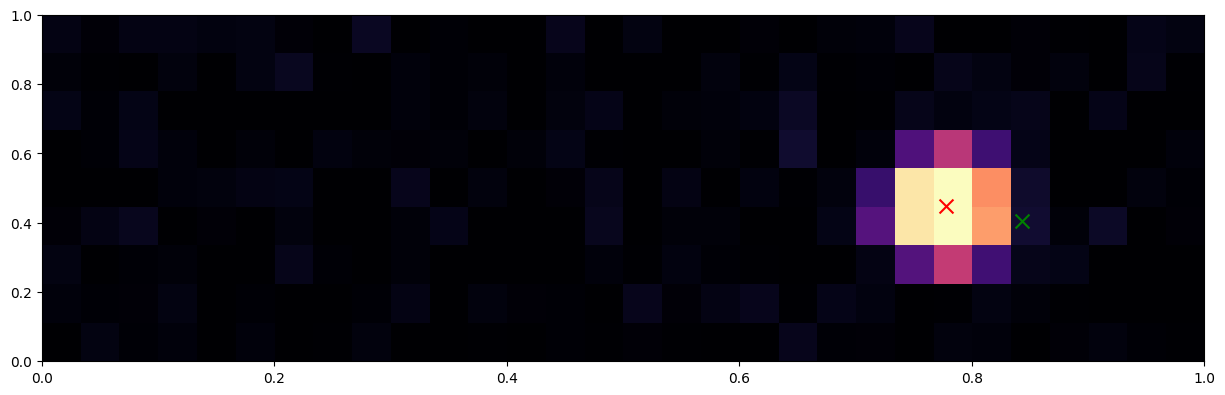

In [ ]:
# Evaluate the model, and plot some examples
test_batch = {'inputs': X_test, 'targets': y_test}
test_loss = evaluate(cnn_state, test_batch)
print(f'Test loss: {test_loss:.4f}')

show_test_images(X_test, y_test, predict=lambda x:predict(cnn_state, x), n=3)

## Simulated data
Augmentation takes real data and adds random variations to make it more diverse, in ways that we can control to fit with our model of the world. Taking this idea a step further, what if we generated *purely synthetic* data? That is, we could *simulate* the sensor process, if we had a forward model of how inputs (touch positions) led to sensor values. We could use that to generate as much data as we wanted. It wouldn't *perfectly* fit the real data, because the simulation will never be perfectly authentic, but it would give a much broader set of training data to work with.

In this case, we actually already have a simulator. The software that turns the keyboard events into fake touch sensor data can be driven with any input we like. We can use this to generate a large dataset of plausible touch sensor data, and then use that to train our model. This is a form of **simulation-based inference** -- we are using a simulation to generate data that we can then use to infer the parameters of our model. 

This has limitations:

* Some aspects, like the size or orientation of the touch blob either have to be guessed or fixed to some arbitrary value.



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


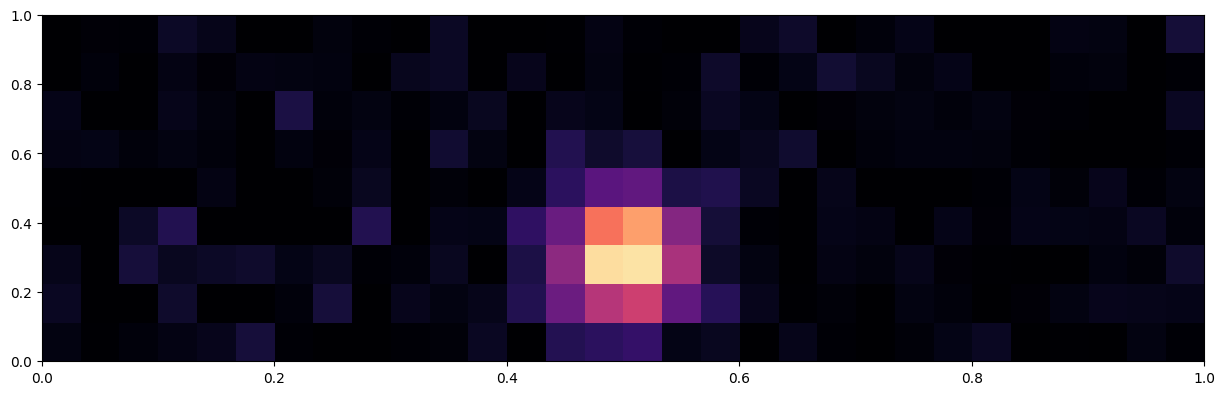

In [ ]:
%load_ext autoreload
%autoreload 2
from key_model import KeySimulator
km = KeySimulator(size=32, slc=[9,30], noise=0.03)

# press and plot
img = km.press(0.5, 0.25)
fig, ax = plt.subplots(figsize=(15, 4.5))
ax.imshow(img, cmap='magma', aspect='auto', extent=[0, 1, 0, 1], vmin=0, vmax=1, origin='lower')b

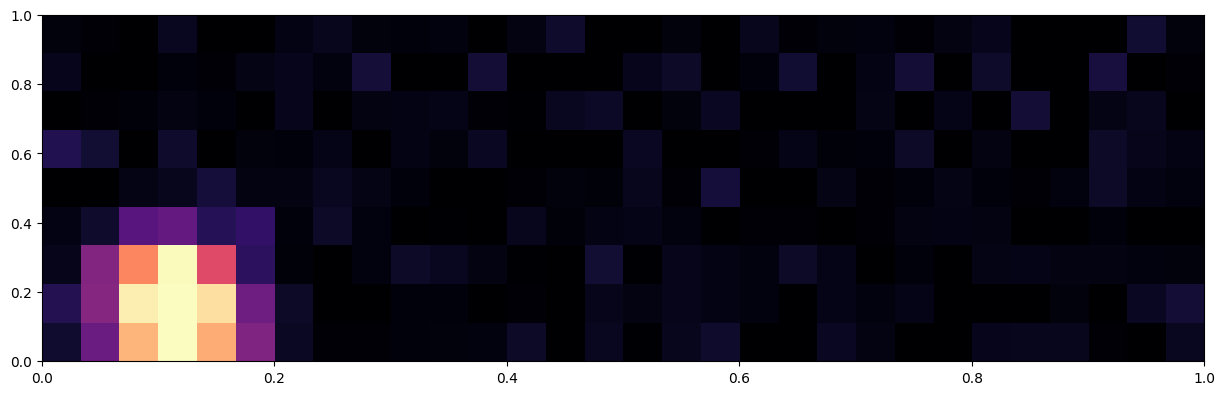

In [ ]:
# press and plot
img = km.press(0.1, 0.1)
fig, ax = plt.subplots(figsize=(15, 4.5))
ax.imshow(img, cmap='magma', aspect='auto', extent=[0, 1, 0, 1], vmin=0, vmax=1, origin='lower')

### Synthetic data
Now we can generate a large amount of synthetic data by setting random parameters (position and size) and generating the corresponding touch sensor images. We know what the target should be, so we can use this to train our model. In this case, we don't really need to augment -- we've already baked in the variation in the parameters into our synthetic generation. We instead just rely on generating a large synthetic dataset and using that to train our model.

In [ ]:
n_synthetic = 2000
X_synthetic = []
y_synthetic = []
# generate the synthetic data
for i in range(n_synthetic):
    target = np.random.random(size=2)
    intensity = np.random.uniform(0.8, 2.2)
    size = np.random.normal(0.06, 0.02)
    img = km.press(target[0], target[1], size=size, intensity=intensity)
    X_synthetic.append(img.flatten())
    y_synthetic.append(target)

X_synthetic = jnp.stack(X_synthetic)
y_synthetic = jnp.stack(y_synthetic)

In [ ]:
# Train the model
rng = jax.random.PRNGKey(42)
learning_rate = 0.001
cnn_state = create_CNN(rng, learning_rate)

batch = {'inputs': X_synthetic, 'targets': y_synthetic}

# train loop
for i in range(5_00):
    cnn_state, loss = train_step(cnn_state, batch)
    if i % 100 == 0:
        print(f'Step {i}, Loss {loss}')

Step 0, Loss 0.37792453169822693
Step 100, Loss 0.009612767025828362
Step 200, Loss 0.0073668272234499454
Step 300, Loss 0.006134997121989727
Step 400, Loss 0.005034351721405983


Test loss: 0.0159


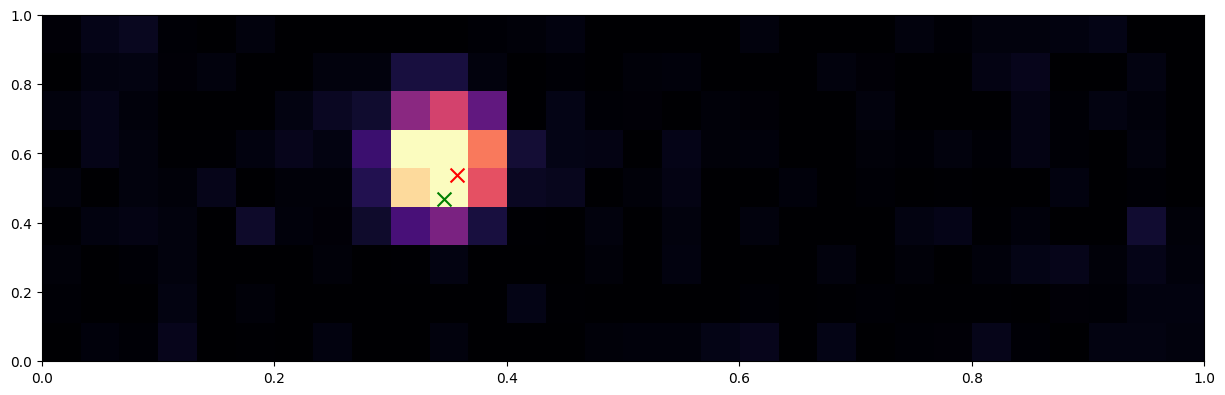

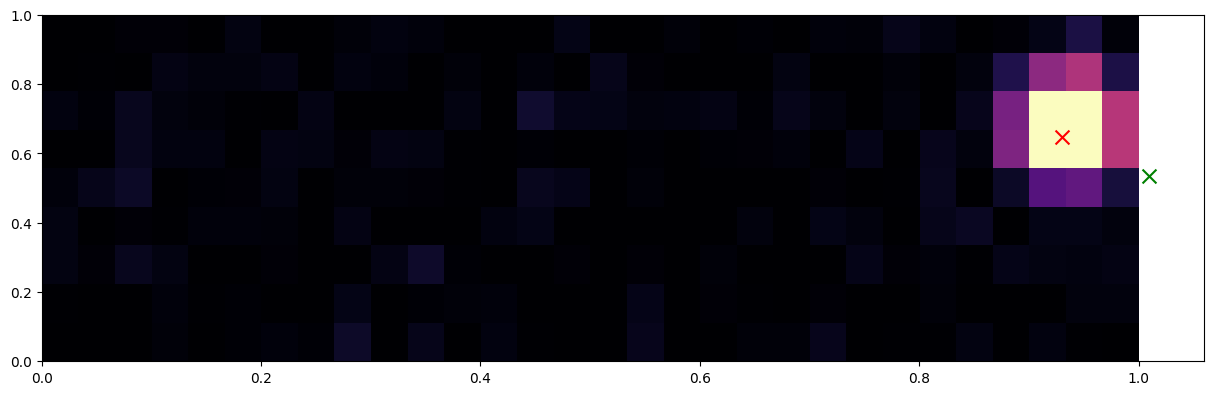

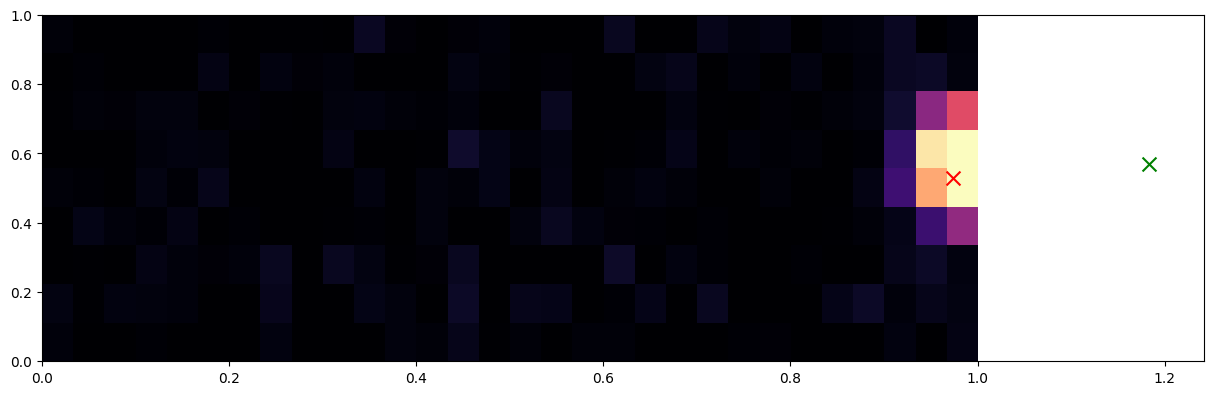

In [259]:
# Evaluate the model, and plot some examples
test_batch = {'inputs': X_test, 'targets': y_test}
test_loss = evaluate(cnn_state, test_batch)
print(f'Test loss: {test_loss:.4f}')

show_test_images(X_test, y_test, predict=lambda x:predict(cnn_state, x), n=3)


## Twisted fists, moving bodies, and stuck keys
Our model is still not perfect. 

**Diversity**

We can improve it by capturing more and more data to cover more diverse situations. For example, people might have their wrist in different orientations when their fist makes contact with the keyboard. This might rotate or distort the blobs. We could set up an experiment and try and induce wrist rotation, and capture more data. But this is a very slow process, and it's hard to cover all the possible variations.

In general, our simulation can be more and more sophisticated but there are dimininshing returns. We can't simulate every possible variation in the real world, and we can't simulate every possible defect in our sensor. But we can get closer and closer to a model that can generate plausible sensor data given an intention. For example, we could hook up a biomechanical simulator (like the one used in `User-in-a-box` by Ikkala et al., "Breathing Life Into Biomechanical User Models", UIST 2022) to generate fist configurations and then model contact with the keyboard. This would be a more sophisticated forward model that could generate more plausible data, but it would also be more computationally expensive.

![User in a box](imgs/uitb.png)

*The user-in-a-box biomechanical model, modelling the musclo-skeletal system of a user to generate plausible user inputs with a monocular visual perception system.*


**Sensing defects**

We also have some known defects in our sensor. You'll notice that sometimes a key gets "stuck" -- this is just due to the way events propagate from the keyboard driver to Python. The "keyup" event is occasionally missed when there are lots of events in quick succession. We can be more careful in data capture to minimise this -- our current data capture has a live preview so we can see this, but that is not always the case. Again, these are things we could add to our forward model to improve the simulation.

**Temporal dynamics**
Our model maps *one frame* of sensor data to a single touch point. It can make arbitrarily large jumps between frames and has no notion of inter-frame consistency. This isn't plausible given we know the fist is attached to a human body with very restricted movement dynamics! We'd expect smooth, continuous motion, with some constraints on the speed and acceleration of the fist. It's less obvious how we can do this with the ML approaches we've seen so far. There are hacks, like concatenating multiple frames as a single input, but they exponentially increase the amount of data we need to capture. 


## Reflection
We've seen:

* a progression from a simple, naive direct inverse model to a more complex model that relies more heavily on *simulation based inference*;
* how we can use our knowledge of the world to constrain our model, reducing the number of paths from an observed image to a possible intention;
* how we can use data augmentation to improve generalisation, as a hybrid between a fully data-driven and a fully model-driven approach;
* how we can use a simulator to mass generate synthetic data to train a machine learning model;
    This is one way of *amortising* inference, where we spend time up front generating synthetic data and fitting a model to it, and then use that (fast) ML model to make inferences in real time. This is a common approach in HCI, where we can't afford to spend a lot of time on inference, but we can spend time up front building a model of the world.


### Steps to a more principled approach
We'll now look at how we can go further in this direction, taking the simulation from offline generation of training data to using *simulation in the loop*. We'll use this to perform **Bayesian inversion**, where we can track a *distribution* over hypotheses about the user's intention, rather than just a single point estimate. This is a powerful tool for HCI, as it allows us to reason about the user's intention in a principled way, and to update our beliefs as new data arrives.

As we'll see, this has significant theoretical advantages, but some computational challenges.


# Computational interaction and Bayesian inversion
Let's get back to computational interaction. A tenet of the approach is that it puts models *first*. Every model in computational interaction will be a bit of code that is executed in order to gain insight into an interaction phenomena that we cannot directly access. Not all things that are called models are equivalent, however. We need to think about the characteristics that of models of interaction: are some better than others?

## On the virtues of models
Given two models that model some interaction phenomena equally well, we'd prefer the model that:

* is easily implemented computationally and fits with software engineering practices;
* is conveniently parameterised, with *interpretable* parameters;
* is generative, and expressed in terms of generating synthetic observations;
* is capable of propagating uncertainty correctly.


## Data generating processes
 We need *models* to do *computational interaction*, and they need to be *executable*. We'd further like them to be *generative*. That implies code that simulates or emulates some part of an interactive system -- a **forward model** that transforms unknown states into the observable quantities they imply. At the heart of Bayesian modelling we have the idea of a **data generating process**, a process which we believe is generating data we observe. We implement this as an algorithm which generates synthetic observations. We've already implemented a simple version of this above.

> The data generating process is just a function!

Every application of Bayesian ideas starts with the data generating process: write down code that will spit out plausible simulations, given some configurable parameters.

### What is uncertainty and where does it come from?
Uncertainty exists in all systems that make contact with the real world. The physical world is not the domain of absolute logical truth, and the human social world is even less so. This is especially true when we project into the future (prediction, or forecasting), but even when reasoning about the present or the past, we must account for and be aware of the uncertainty involved.

In interaction, we have, in the simplest case, two parties, or agents: 

* a brain, embedded in a human, embedded in a physical world
* and software, embedded in computer hardware, embedded in the same physical world. 

Each of these "agents" has uncertainty about the other. Some of this uncertainty is due to the world that separates them (e.g. noise in the motor system). Some of it is because they do not (yet) have knowledge of each others' states.

#### Epistemic, aleatoric and approximation

We can separate out some *types* of uncertainty:

* **Epistemic uncertainty** is uncertainty about what we know (hence epistemic) arising from the limitations of our knowledge (as encoded by a model).  If I've only ever met one person, my epistemic uncertainty about the height of people is likely to be large -- I don't *know* how tall people are.
* **Aleatoric uncertainty** is that which arises from (presumed) randomness in the world. If I toss a coin, my uncertainty about which side lands face up is aleatoric. This type of uncertainty cannot be resolved by better modelling, more data, etc.; it is irreducible. Even if I have an excellent model of people's heights, any given person's height won't be precisely predicted by that model.
* **Approximation uncertainty** arises from the limitations of computation to approximate inference. In general, Bayesian methods cannot be applied exactly, and so the results are subject to additional uncertainty.



# Bayesian Inversion

### A mysterious entity

We can imagine that the phenomena we are interested in (some interaction problem, say) is a mysterious entity who emits observable quantities (like the time taken to click on a menu item) but whose internal operation is inscrutable.

<img src="imgs/entity.png">

We can see the **data generating process** (our model) as a tame mysterious entity, who generates samples when simulating and can also judge the quality of observations (likelihood) when fed them.  The mysterious entity is controlled by parameters (dials) which adjust the simulation and its opinion of the quality of observations. What we want is to know *which* mysterious entity parameters are compatible with the true (but unseen) mysterious entity.

### Bayesian inversion

This is a problem of **inversion**; working out what was happening in the unobserved realm by deducing plausible behaviours compatible with the observations. Working out what age someone is given how tall they are is an inverse problem. Working out how tall they are given their age is a forward problem. In Bayesian modelling we use the **forward** model (the data generating process) as the key step to build our inversion model. 

> The approach we just saw previously attempts to solve inversion directly, in a single function; in the age/height example we might build a machine learning model that predicts ages given heights by fitting a deep network to lots of paired `(age, height)` examples. We could then, at inference time, feed it a height and it would return an age. Critically, it would only return *one* age -- the best predicted age (as directed by the objective function used to train the network). This is very much **not** what we will do in the Bayesian models.

> * ML models: typically invert by optimising to find a single inverse function.
> * Bayesian models: invert by forming a distribution over inverse functions that are plausible, given observations.

## What is a Bayesian inverse model?

A Bayesian model:

* A generative model of the phenomena under consideration, that simulate plausible observations. **A simulator**
* Represents, preserves and manipulates uncertainty about unknown parameters. Uncertainty is **first-class**.
* Reasons about the unknown parameters that modulate the behaviour of those generative models.
* Uses *likelihood* to invert forward models.


## Probabilistic filtering
One view on interaction is to see user intentions as **unknown values** which are partially observed through input sensors. The time series of inputs from the user only give a partial, noisy, incomplete view of intention inside the user's head. 

Probabilistic filtering **(PF)** tracks the evolution of some unknown variables *[user intentions]* given observed evidence *[user input]*, in a way that is **robust**. Probabilistic filters infer a **distribution** over possible hidden (unobserved) variables, updating them over time. These filters are inherently **uncertain**, as they represent degrees of belief, and **dynamic**, as they explicitly model changing state over time.

These filters include *simulators* that *simulate* how possible user behaviors might unfold over time. In some probabilistic filters, hundreds of parallel simulators are run, each with slightly different parameters. In all cases, the simulations are adjusted online to better match observed reality. The internal parameters that drive the simulation are the *unknown variables* we want to infer and the *evidence* is the observed reality that adjusts the simulation parameters.

Probabilistic filtering is an **inverse probability** approach, and it requires that we think of interaction from an unique perspective. We have to explicitly be able to write down:

* what we want to know (i.e. the **state space of intention**);
* how that will change over time (i.e. the **dynamics of intention**);
*  a model that *if we knew what the user intention was, what the expected behavior would be* (i.e. a **generative function mapping intention -> expected user inputs**).


### Benefits
What benefits could this have over our direct ML approach?

* **Robustness to noise** PFs work well even with input sensors that are (very) noisy.
* **Minimal data requirements** We don't have to have a lot of data to train a PF; we might not need any at all.
* **Robustness to poorly specified models** PFs can cope predictably even if our models are bad.
* **Robustness to intermittence** PFs can continue to sensibly interpolate when input cuts out.
* **Uncertainty estimates** PFs *know how certain they are* and this can be used in the interaction design.
* **Decoupled from real-time** PFs can infer past (smoothing), present (filtering) and future (forecasting).
* **Inherent fusion of multiple input sensors** PFs are often used to solely to fuse together multiple inputs from different sensors.
* **Better feedback** PFs  offer the opportunity to give users rich insight into the process of intention decoding.
* **Flexible modeling** PFs can incorporate both fundamental modeling (e.g. physiological or cognitive models) and data-driven machine learning.

### Limitations
There are drawbacks:

* **Computational demands** PFs can be computationally expensive, especially if the state space is large.
* **Model specification** PFs require a good model of the world to work well. That means we need a good simulator.
* **Likelihood specification** PFs need some a way of saying how "likely" a real observation is, given a simulated one, or an ensemble of them. This can be hard to specify.
* **Not data-driven** If we *have* lots of data, we don't necessarily have a good way of making use of it in a PF. We can't just throw data at the problem and expect it to work.

## Bayesian modelling
![The input problem](imgs/brain_inference.png)

### Probability as a calculus of belief
*Bayesians* treat probability as a **calculus of belief**; in this model of thought, probabilities are measures of degrees of belief. All reasoning happens in terms of *probability distributions* over outcomes. For example, in our fist pointer example, we might have a distribution over possible fist locations. The relative likelihood of different configurations is given using probabilities. The notation $P(A)=0$ means a belief that $A$ cannot be true and $P(A)=1$ is a belief that $A$ is absolutely certain. (note: this isn't exactly true for technical reasons, but we'll skip that for now!) 


#### Probability as the optimal way of representing uncertainty
Other representations of uncertainty are strictly inferior to probabilistic methods *in the sense that* a person, agent, computer placing "bets" on future events using probabilistic models has the best possible return out of all decision systems when there is uncertainty. 

*Bayesians* allow for belief in states to be combined and manipulated via the rules of probability. The key process in Bayesian logic is *updating of beliefs*. Given some *prior* belief (it's Glasgow, it's not likely to be sunny) and some new evidence (there seems to be a bright reflection inside) we can update our belief to calculate the *posterior* -- our new probability that it is sunny outside. Bayesian inference requires that we accept priors over events, i.e. that we must explicitly quantify our assumptions with probability distributions. 

### Prior, likelihood, posterior, evidence

We often want to know the probability of a some outcome $A$ given some other outcome $B$; that is $P(A|B)$. But we are often in the situation that we can only compute $P(B|A)$.  This is Bayesian inversion.

In general $P(A|B) \neq P(B|A);$ and the two expressions can be completely different. 

Typically, this type of problem occurs where we:
* want to know the probability of some event given some *evidence* 
* but we only know the probability of the evidence given the event 

**Bayes' rule** gives a consistent way to invert the probability distribution:
$$ \begin{equation} P(A|B) = \frac{P(B|A) P(A)}{P(B)} \end{equation}$$

This follows directly from the axioms of probability. Bayes' Rule is a very important rule, and has some surprising results.

* $P(A|B)$ is called the **posterior** -- what we want to know, or will know after the computation
* $P(B|A)$ is called the **likelihood** -- how likely the event $A$ is to produce the evidence we see
* $P(A)$ is the **prior**  -- how likely the event $A$ is regardless of evidence
* $P(B)$ is the **evidence** -- how likely the evidence $B$ is regardless of the event.

Bayes' rule gives a consistent rule to take some prior belief and combine it with observed data to estimate a new distribution which combines them.

We often phrase this as some **hypothesis** $H$ we want to know, given some **data** $D$ we observe, and we write Bayes' Rule as:
$$ \begin{equation}P(H|D) = \frac{P(D|H) P(H)}{P(D)} \end{equation}$$

(the probability of the hypothesis given the data) is equal to (the probability of the data given the hypothesis) times (the probability of the hypothesis) divided by (the probability of the data).

In other words, if we want to work out how likely a hypothesis is to be true given observations, but we only know how likely we are to have seen those observations if that hypothesis *was* true, we can use Bayes' rule to solve the problem.

## Bayes' rule for combining evidence
Bayes' rule is the correct way to combine prior belief and observation to update beliefs. This can be used to "learn", where "learning" means updating a probability distribution based on observations. It has enormous applications anywhere uncertain information must be fused together, whether from multiple sources (e.g. sensor fusion) or over time (e.g. probabilistic filtering). 



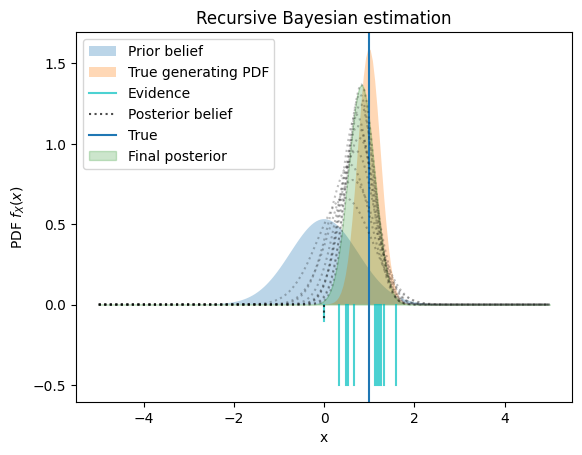

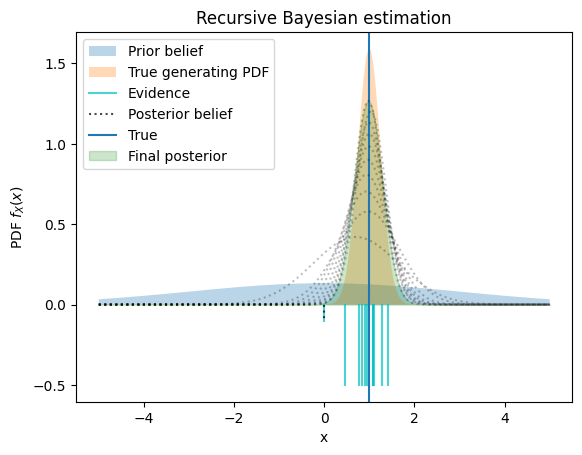

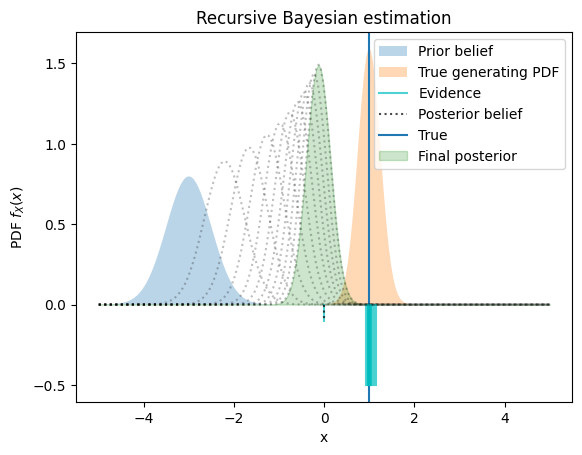

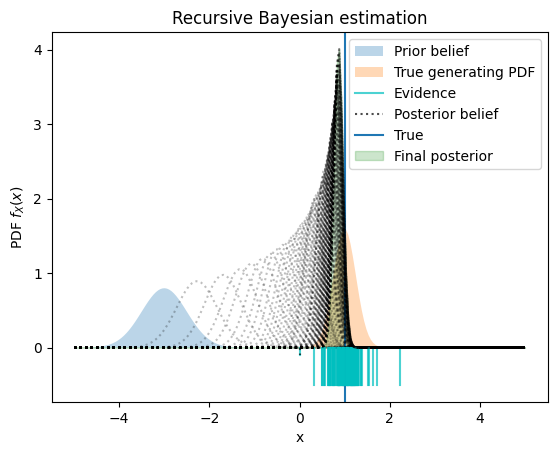

In [261]:

import time
import scipy.stats

def prior_posterior(prior_mean=0, prior_std=1, sonar_std=1, n=10, anim=False):
    mean = prior_mean
    std = prior_std
    var = std*std
    prior = scipy.stats.norm(mean,std)
    evidence = scipy.stats.norm(1, 0.25)
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    
    xs = np.linspace(-5,5,200)
    ax.fill_between(xs, prior.pdf(xs), label="Prior belief", alpha=0.3)
    ax.fill_between(xs, evidence.pdf(xs), label="True generating PDF", alpha=0.3)
    
    sample_var = sonar_std**2 # the *expected* variance of our observations
    # note that changing this allows us to continously adjust our belief
    # in our observations 
    ax.plot([0,0],[0,-0.1], 'c', alpha=0.7, label="Evidence")
    ax.plot([0,0],[0,-0.1], 'k:', alpha=0.7, label="Posterior belief")
    ax.set_title("Recursive Bayesian estimation")
    
    ax.set_xlabel("x")
    ax.set_ylabel("PDF $f_X(x)$")
    ax.axvline(1.0, label='True')
    ax.legend()
    for i in range(n):
        
        sample = evidence.rvs()
        # single step update for a normal distribution    
        mean = (var * sample + sample_var * mean) / (sample_var + var)
        var = (var*sample_var) / (sample_var+var)     
        
        sample_pdf = scipy.stats.norm(sample, sonar_std).pdf
        
        # plot the sample and the resulting pdf
        ax.plot([sample,sample],[0,-0.5], 'c', alpha=0.7)
        if anim:
            ax.plot(xs,-sample_pdf(xs), 'c', alpha=0.25)
        ax.plot(xs, scipy.stats.norm(mean,np.sqrt(var)).pdf(xs), 'k:', alpha=0.25)
        if anim:            
            time.sleep(1.0)
            fig.canvas.draw()
        
        
    ax.fill_between(xs, scipy.stats.norm(mean,np.sqrt(var)).pdf(xs), color='g', label="Final posterior", alpha=0.2)
    ax.legend()

prior_posterior(0,0.75)
prior_posterior(0,3)
prior_posterior(-3,0.5)
prior_posterior(-3,0.5, n=100)

# Probabilistic filtering
We will use this recursive form of Bayesian updating to estimate user intentions online. This is a **probabilistic filter**, as described in the introduction.

This filter maintains a state distribution, which is used as prior for the next step of estimation. Evidence is observed, and a posterior is computed; this becomes the prior for the next step, after a **prediction** step is used to align the prior with the known or estimated behaviour.

Unlike other filters, such filters maintain a **distribution** over some hidden variable we are trying to estimate. This makes it possible for them to cope with noise and uncertainty robustly. It also complicates their implementation, but their are good models which are readily available.

In HCI, at the very highest level, we want to estimate **intention $X_t$** given **sensor input $Y_t$** $P(X_t|Y_t)$, both of which change over time. 

* **Abstraction** $X_t$ might be expressed across multiple levels of abstraction. For example, "targeting a point", "entering a letter", "entering a command", "opening a file", "rearranging a document"
* **Sensing** $Y_t$ might be distributed over timescales (e.g. immediate cursor information versus learned language model) and over sensor modalities (e.g. combining information from a pose sensor with microphone data to estimate surface contact events).

## Probabilistic filtering terminology 

Notation (note the reversal of $X$ and $Y$ from the ML formulation!):
* We have a sequence of states over time, indexed by $t$
* $X_t$ the variable we want to know (at time $t$) (e.g. an intention inside a user's head). 
* $Y_t$ the variable we can observe (e.g. a sensor we can get readings from).
* For computational simplicity, we assume **discrete time**, i.e. we observe sensors in a discrete, regularly sampled way.

* We want to compute $P(X_t|Y_t)$ (the **inverse problem**). 
* We use a **forward model** $P(Y_t|X_t)$ to infer this.
* We need to define two functions: ${\bf\hat{y_t}} = f({\bf \hat{x}}_t)$ (the **observation function**) and $\hat{\bf x}_{t} = g(\hat{\bf x}_{t-1})$ (the **dynamics** or **process function**).
* We also need to compute the likelihood of the real observation given our model: $p(\bf\hat{y_t}|{\bf y_t})$.

* $f$, $g$ are often very simple functions.

<img src="imgs/stochastic.png" width="75%">

#### Recursive filtering

<img src="imgs/recursive.png">

Probabilistic filters are sometimes called **recursive Bayesian filters**. 
* They are **Bayesian** because they represent belief about states via probability distributions.
* They are **recursive** because they take a *prior*, condition on *evidence* and compute a *posterior*; this *posterior* then becomes the *prior* at the next time step.

As well as straightforward conditioning on observed evidence, probabilistic filters incorporate dynamics which form predictions of the world at the next time step. **This is a predictor-corrector model**; the dynamics model supplies predictions, and corrections to those predictions are applied by the observation model.

## The task
We want to recover the **intended position** of the cursor from the **observed sensing**.

* That is, we have $\bf x_t$ be the **intended position** of the cursor at $t$ (this is the hidden variable we wish to estimate). The intended position exists in the user's head.
* We have $\bf y_t$, the observation made at time $t$, which might be the displacement vector the OS reports in our example. 

We need to write down our model explicitly:

* **State space for $\bf x_t$**. $\bf x_t$ is our belief about intended location. It obviously has at least two coordinates giving an intended location in touch space. But we can do a better job at predicting motion if we assume some predictable smooth *dynamics* of the cursor. In particular, we can assume that there is some associated **velocity** and **acceleration** of the cursor, and at each time point time. We can also assume that the fist isn't always touching the sensor; it could be raised or lowered. We can add a $z$ coordinate to account for the "height" of the fist. ${\bf x_t} = [x_t, y_t, z_t, \dot{x}_t, \dot{y}_t, \dot{z}_t, \ddot{x}_t, \ddot{y}_t, \ddot{z}_t]$.
($\dot{x}$ means the first time derivative of $x$, $\ddot{x}$ means the second time derivative of $x$).

* **State space for $y_t$** $y_t$ is given by our sensor configuration. We receive a 270 element vector representing a 9x30 grid of touch sensor activations.
So ${\bf y_t} = [s_1, s_2, \ldots, s_{270}]$.

* **Prior** *where would we believe the cursor to be if we had made no measurement? $p({\bf x_0})$*
We can assume the fist is intended to be somewhere on or near the keyboard. Beyond that, we might not have any guesses as to where the cursor might be. We could be clever and assume that the cursor is likely to be near targets of interest (e.g. close to menu headers) if we had a hole UI, but for now, we will assume a simple normal prior. We can assume a simple normal distribution on velocity and acceleration.


* **Dynamics** *given a current estimate of intended position, where would we expect the next intended position to be?*
We would assume that the user's hand is probably near where it was, but is moving smoothly some velocity and acceleration: after all, it is the result of a physical motion in the world and thus has second-order dynamics.
This is the function $f$ in $${\bf x_{t+1}} = f({\bf x_t}) + \epsilon$$

* **Observation** *given our estimate of intended position, what observations would we expect?*
We'll assume that the velocity of the cursor gives us the frame-by-frame delta in mouse position. The observation is assumed to be a noisy representation of the true velocity.
This is the function $g$ in $$\hat{\bf y_t} = g({\bf x_t}).$$ 

* **Likelihood** given an observation, how probable is it under compared to our expected observations? This is the likelihood function $$P({\bf y_t}|{\bf x_t}) = P({\bf y_t}|{\bf \hat{y_t}})$$

We cannot in general compute these when $x_t$ is a random variable, because we have no direct way of applying functions to *distributions* rather than to specific known points. We can, however, sample from the distribution and apply the function to the samples. This is the basis of **particle filtering**.

Essentially, we use our **forward model** to generate lots of samples of possible sensing that might be expected; compare that against what we have; and then update our belief about the user's intention based on the comparison. This avoids any annoying mathematical trickery to compute the likelihood directly.


* **State space for $\bf x_t$**. $\bf x_t$ is our belief about intended location. It obviously has at least two coordinates giving an intended location in screen space. But we can do a better job at predicting motion if we assume some predictable smooth *dynamics* of the cursor. In particular, we can assume that there is some associated **velocity** and **acceleration** of the cursor, and at each time point time, ${\bf x_t} = [x_t, y_t, \dot{x}_t, \dot{y}_t, \ddot{x}_t, \ddot{y}_t]$.
($\dot{x}$ means the first time derivative of $x$, $\ddot{x}$ means the second time derivative of $x$).

### Particle filter

### Particle filter terms

## Fusion


